## Overview:

We will start by importing TensorFlow as tf, proceed to load the MNIST Fashion database with Keras API, then separate the data into training and test groups.

Then, a process that is typically done is to normalize the data we have from images, in that instant we can create our sequential model.


- **Sequential:** That defines a SEQUENCE of layers in the neural network

- **Flatten:** Just takes that square and turns it into a 1 dimensional set.

- **Dense:** Adds a layer of neurons


- Each layer of neurons need an activation function to tell them what to do. There's lots of options, but just use these for now.


- Relu effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

- Softmax takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!


After creating our model, it was trained and evaluated with the test group


In [1]:
import tensorflow as tf
print(tf.__version__)
print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tf.keras.__version__}")
print()
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

2.1.0
Tensor Flow Version: 2.1.0
Keras Version: 2.2.4-tf

GPU is available


In [2]:
mnist = tf.keras.datasets.fashion_mnist

In [3]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

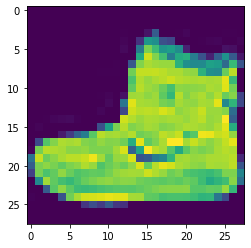

In [4]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

In [5]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [6]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [7]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 43us/sample - loss: 0.5050 - accuracy: 0.8205
Epoch 2/5
60000/60000 [==============================] - 2s 40us/sample - loss: 0.3762 - accuracy: 0.8632
Epoch 3/5
60000/60000 [==============================] - 2s 41us/sample - loss: 0.3380 - accuracy: 0.8775
Epoch 4/5
60000/60000 [==============================] - 3s 42us/sample - loss: 0.3137 - accuracy: 0.8844
Epoch 5/5
60000/60000 [==============================] - 3s 43us/sample - loss: 0.2933 - accuracy: 0.8919


In [8]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 35us/sample - loss: 0.3485 - accuracy: 0.8727


[0.34852956848144534, 0.8727]

In [9]:
classifications = model.predict(test_images)

print(classifications[0])

[4.81253392e-06 6.13091160e-08 1.94008499e-06 7.01716962e-10 5.80596293e-07 6.25324203e-03 2.06431946e-06 3.01697236e-02 1.07763435e-05 9.63556826e-01]


Hint: try running print(test_labels[0]) -- and you'll get a 9. Does that help you understand why this list looks the way it does? 

In [10]:
print(test_labels[0])

9


### Work1: 
Experiment with different values for the dense layer with 512 neurons.

In [15]:
import tensorflow as tf
print("tf version: ",tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)



tf version:  2.1.0
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.1843
Epoch 2/5
60000/60000 [==============================] - 4s 73us/sample - loss: 0.0750
Epoch 3/5
60000/60000 [==============================] - 4s 74us/sample - loss: 0.0473
Epoch 4/5
60000/60000 [==============================] - 4s 73us/sample - loss: 0.0364
Epoch 5/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0268


In [19]:
model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print("\nthe class is ",test_labels[0])

10000/10000 [==============================] - 0s 31us/sample - loss: 0.3662
[1.7096196e-06 1.8325028e-07 1.7938921e-06 5.5957969e-07 8.7291443e-07 3.5702458e-03 2.7199487e-06 3.8297113e-02 2.8106726e-05 9.5809668e-01]

the class is  9


### Work2: 

We can stop our training with a function according to our needs, this is really useful because we would not need to go through all epoch.


In [3]:
import tensorflow as tf


class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.4):
      print("\nReached 60% accuracy so cancelling training!\n")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])


Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 50us/sample - loss: 0.4748
Epoch 2/5
59072/60000 [============================>.] - ETA: 0s - loss: 0.3583
Reached 60% accuracy so cancelling training!

60000/60000 [==============================] - 3s 47us/sample - loss: 0.3572
